## 图像平滑操作

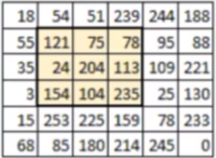

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def CV2_Show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
img = cv2.imread('shrink37.jpg')
CV2_Show('IMG', img)

In [ ]:
# 均值滤波
# 简单的平均简单操作
blur1 = cv2.blur(img, (2, 2)) # 输入参数为卷积图像img，卷积核大小2x2
blur2 = cv2.blur(img, (3, 3)) # 卷积核大小3x3
blur3 = cv2.blur(img, (5, 5)) # 卷积核大小5x5
res = np.hstack((blur1, blur2, blur3))
CV2_Show('res', res)

In [ ]:
# 方框滤波
# 基本和均值一样，可以选择归一化
box1 = cv2.boxFilter(img, -1, (3,3), normalize=True)
# -1表示滤波后的图像与原始图像的颜色通道数一致
# normalize=True，进行归一化操作
CV2_Show('Box', box1)

In [ ]:
# 方框滤波
# 基本和均值一样，可以选择归一化， False即为不归一化，容易越界
box2 = cv2.boxFilter(img, -1, (3,3), normalize=False)
CV2_Show('Box', box2)
# 越界后越界值直接取255
# 是否选择归一化则是方框滤波和均值滤波的区别

In [ ]:
# 高斯滤波
# 将较与均值滤波，高斯滤波对不同像素的权重不同，一般以卷积核中心像素为最重，距离越远权重越小
gaussion = cv2.GaussianBlur(img,(3, 3), 1)
CV2_Show('Gaussion', gaussion)

In [ ]:
# 中值滤波
# 取从小到大排序的中间值，作为平滑滤波之后的结果
medium1 = cv2.medianBlur(img, 3) # 输入参数ksize为整型integer变量，与之前几个滤波函数有所不同（前为元组tuple类型变量）
medium2 = cv2.medianBlur(img, 5)
res = np.hstack((img, medium1, medium2))
CV2_Show('res', res) # 运行发现失去了一些特征，边界产生模糊，但噪声消除的十分明显

In [ ]:
# 展示所有
images = [blur, box1, box2, gaussion, medium]
titles = ['blur', 'box1', 'box2', 'gaussion', 'medium']

# for i in range(5):
#     plt.subplot(2, 3, i + 1),plt.imshow(images[i], 'gray')
#     plt.title(titles[i])
#     plt.xticks([]), plt.yticks([])
# plt.show()
res = np.hstack((blur, box1, box2, gaussion, medium)) # 将图片拼合在一起，本质上就是数组之间的拼合
CV2_Show('ALL', res)

## 形态学-腐蚀操作
一般对二值化图像进行腐蚀操作

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def CV2_Show(name, img):
    cv2.imshow(name, img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [3]:
img = cv2.imread('simple.jpg')
CV2_Show('img', img)

In [4]:
kernel = np.ones((2, 2), np.uint8)
erosion = cv2.erode(img, kernel, iterations = 1)
CV2_Show('erosion', erosion)

In [5]:
circle = cv2.imread('circle.jpg')
CV2_Show('Circle', circle)

In [6]:
kernel = np.ones((30, 30), np.uint8)
erosion_1 = cv2.erode(circle, kernel, iterations = 1)
erosion_2 = cv2.erode(circle, kernel, iterations = 2)
erosion_3 = cv2.erode(circle, kernel, iterations = 3)
res = np.hstack((erosion_1, erosion_2, erosion_3))
CV2_Show('res', res)

## 形态学-膨胀操作

In [7]:
img = cv2.imread('simple.jpg')
CV2_Show('img', img)

In [8]:
kernel = np.ones((2, 2), np.uint8)
simple_erosion = cv2.erode(img, kernel, iterations = 1)
CV2_Show('erosion', simple_erosion)

In [9]:
kernel = np.ones((2, 2), np.uint8)
simple_dilate = cv2.dilate(simple_erosion, kernel, iterations = 1)
CV2_Show('dilate', simple_dilate)

In [10]:
circle = cv2.imread('circle.jpg')
CV2_Show('Circle', circle)

In [11]:
kernel = np.ones((30, 30), np.uint8)
dilate_1 = cv2.dilate(circle, kernel, iterations = 1)
dilate_2 = cv2.dilate(circle, kernel, iterations = 2)
dilate_3 = cv2.dilate(circle, kernel, iterations = 3)
res = np.hstack((dilate_1, dilate_2, dilate_3))
CV2_Show('res', res)

## 开运算与闭运算

In [7]:
# 开运算：先腐蚀，再膨胀
img = cv2.imread('simple.jpg')
kernel = np.ones((2,3), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
CV2_Show('opening', opening)

In [13]:
# 闭运算：先膨胀，再腐蚀
img = cv2.imread('simple.jpg')
kernel = np.ones((2,3), np.uint8)
opening = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
CV2_Show('opening', opening)

## 梯度运算

In [14]:
# 梯度 = 膨胀 - 腐蚀
img = cv2.imread('circle.jpg')
kernel = np.ones((10,10), np.uint8)
dilate = cv2.dilate(img, kernel, iterations = 5)
erosion = cv2.erode(img, kernel, iterations = 5)

res = np.hstack((dilate, erosion))
CV2_Show('res', res)

In [15]:
gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel, iterations = 5)
CV2_Show('gradient', gradient)

## 礼帽与黑帽
- 礼帽 = 原始输入 - 开运算结果
- 黑帽 = 闭运算结果 - 原始输入

In [8]:
# 礼帽  基本可以得到去除的毛刺
img = cv2.imread('simple.jpg')
kernel = np.ones((2,3), np.uint8)
tophat = cv2.morphologyEx(img, cv2.MORPH_TOPHAT, kernel)
CV2_Show('tophat', tophat)

In [9]:
# 黑帽  可以得到闭运算的误差
img= cv2.imread('simple.jpg')
kernel = np.ones((3, 3), np.uint8)
blackhat = cv2.morphologyEx(img, cv2.MORPH_BLACKHAT, kernel)
CV2_Show('blackhat', blackhat)

# 由于不同数据对应不同结果，所以对于不同的礼帽、黑帽得到的最终数据有不同的解释

# 总结
## 形态学中最常用的几个函数
### 腐蚀
```python
erode = cv2.erode(img, kernel, iterations = 1) # img为输入原始图像，kernel为卷积核，iterations为迭代次数
```
### 膨胀
```python
dilate = cv2.dilate(img, kernel, iterations = 1) # img为输入原始图像，kernel为卷积核，iterations为迭代次数
```
### 形态学操作
```python
result = cv2.morphologyEx(img, op, kernel) # img为输入原始图像，op为选择形态学操作的参数，kernel为卷积核
```
- cv2.MORPH_OPEN:开运算，先腐蚀后膨胀
- cv2.MORPH_CLOSE:闭运算，先膨胀后腐蚀
- cv2.MORPH_GRADIENT:梯度运算 = 膨胀 - 腐蚀
- cv2.MORPH_TOPHAT:礼帽 = 原始图像 - 开运算结果
- cv2.MORPH_BLACKHAT:黑帽 = 闭运算结果 - 原始图像